<b>Credit Card Approval Analysis & Prediction</b>


<p>
    <b>Objective:</b> It involves studying the factors influencing the approval or rejection of credit card applications.
In this project, we utilised Python to analyse and predict credit card approval outcomes. The objective is to gain insights into the factors affecting approvals and to build a predictive model that automates and enhances the decision-making process.
</p>

In [ ]:
pip install seaborn


In [16]:

#importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("LoanApprovalPrediction.csv") 


In [17]:
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [19]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)


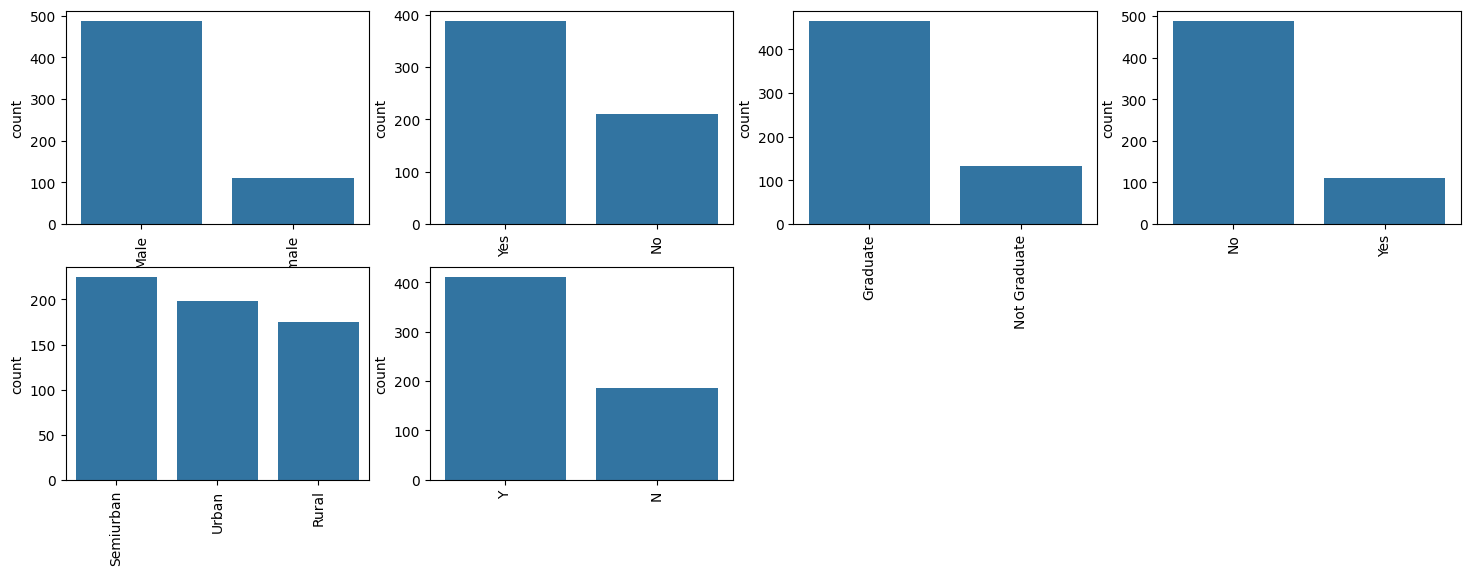

In [20]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols:  
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1



In [21]:
# Import label encoder 
from sklearn import preprocessing 
	
# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])


In [22]:
# To find the number of columns with 
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

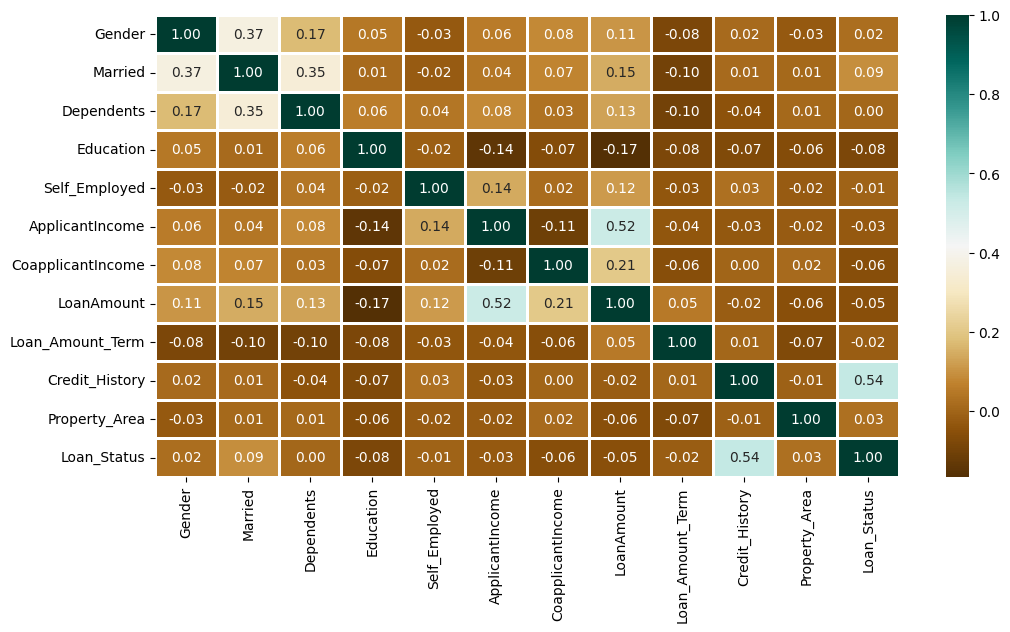

In [44]:

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6)) 

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
			linewidths=2,annot=True)


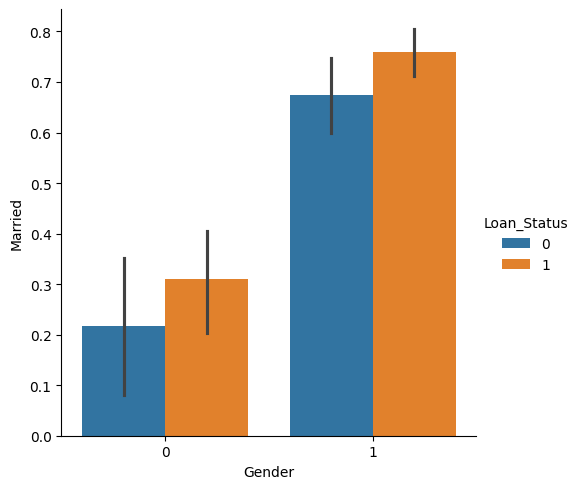

In [24]:
sns.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar", 
			data=data)


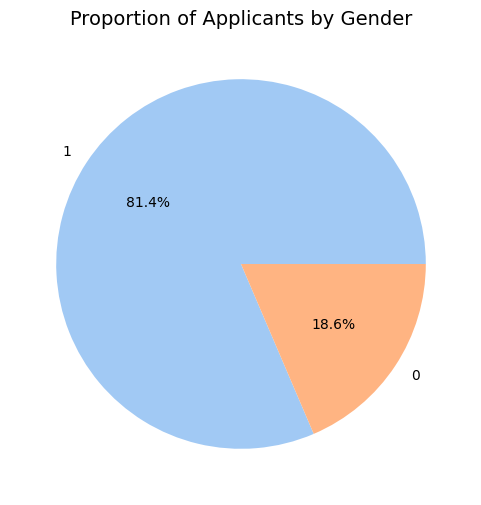

In [38]:
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Applicants by Gender', fontsize=14)
plt.ylabel('')  
plt.show()

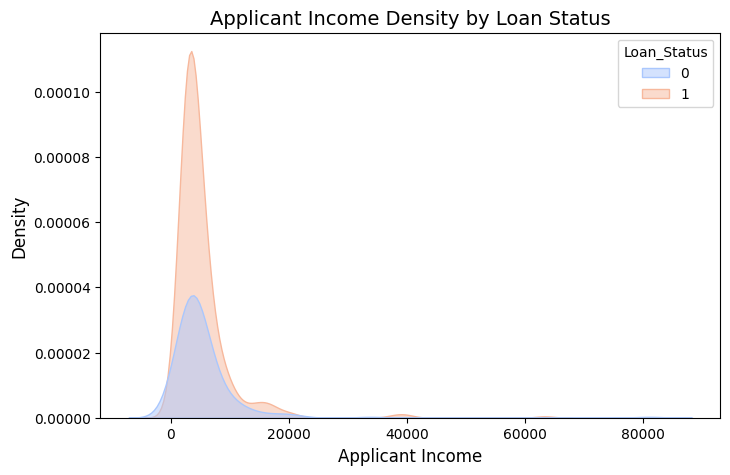

In [32]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='ApplicantIncome', hue='Loan_Status', fill=True, alpha=0.5, palette='coolwarm')
plt.title('Applicant Income Density by Loan Status', fontsize=14)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

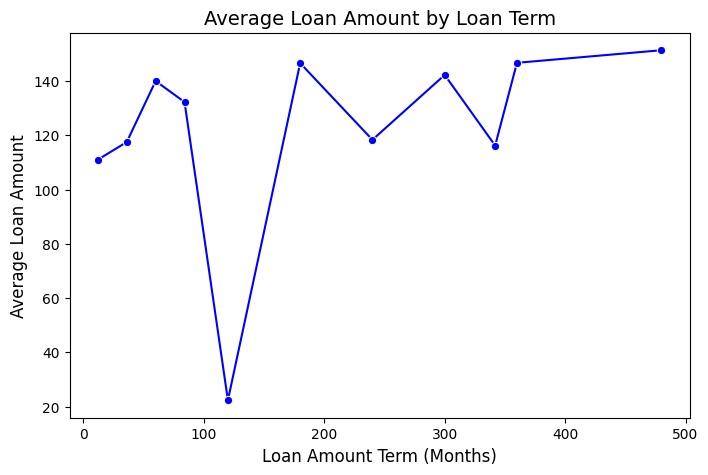

In [36]:
avg_loan_by_term = data.groupby('Loan_Amount_Term')['LoanAmount'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x='Loan_Amount_Term', y='LoanAmount', data=avg_loan_by_term, marker='o', color='blue')
plt.title('Average Loan Amount by Loan Term', fontsize=14)
plt.xlabel('Loan Amount Term (Months)', fontsize=12)
plt.ylabel('Average Loan Amount', fontsize=12)
plt.show()

In [43]:

# Data Cleaning
for col in data.columns: 
   data[col] = data[col].fillna(data[col].mean()) 
	
data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<p>
    <b>Conclusion:</b> The Credit Card Approval Analysis project successfully identified key factors influencing approval decisions and built a predictive model to streamline and automate the process. This approach enhances decision-making efficiency while reducing biases and errors, offering valuable insights for financial institutions.
</p>
